In [1]:
import dataloader
from dataloader import clean_text, lemmatize_text
from textaug import text_aug

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder

/Users/nielspace/pytorchenv/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
[nltk_data] Downloading package punkt to /Users/nielspace/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/nielspace/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/nielspace/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
enc = LabelEncoder()

file_list = dataloader.csv_concat(dataloader.DATA_PATH)
df = dataloader.file_structuring(file_list)

code_enc = enc.fit_transform(df.codes)
df["code_enc"] = code_enc

df.head()

,notes,codes,desc,code_enc
0,Patient underwent surgical intervention for St...,M00.0,Staphylococcal arthritis and polyarthritis,0
1,Operative note: Patient presented with Staphyl...,M00.0,Staphylococcal arthritis and polyarthritis,0
2,Operative intervention performed for Staphylo...,M00.0,Staphylococcal arthritis and polyarthritis,0
3,Patient underwent surgical management for Stap...,M00.0,Staphylococcal arthritis and polyarthritis,0
4,Surgical intervention performed for Staphyloco...,M00.0,Staphylococcal arthritis and polyarthritis,0


In [3]:
print(df.isna().sum())

df.dropna(inplace=True)

print(df.isna().sum())

notes       9
codes       0
desc        0
code_enc    0
dtype: int64
notes       0
codes       0
desc        0
code_enc    0
dtype: int64


In [4]:
df.drop_duplicates(inplace=True)

<AxesSubplot:>

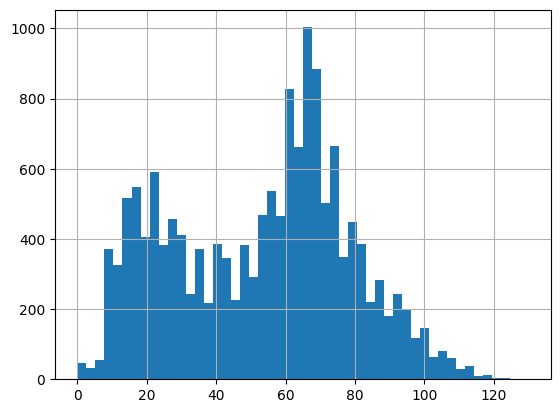

In [5]:
df['Word_Count'] = df['notes'].apply(lambda x: len(x.split()))
df.Word_Count.hist(bins=50)

In [6]:
words_to_exclude = ['Certainly!']
df = df[~df['notes'].str.contains('|'.join(words_to_exclude))].copy()

word_to_remove = ["1.", "2.", "3.", "4.", "5.", "6.", "7.", "8.", "9.", "10.", 'Certainly!', '00', '00 00', '00 00 00']
for w in word_to_remove:
    df['notes'] = df['notes'].str.replace(w, '')

df = df[df['Word_Count'] >= 10]
df.shape

(15167, 5)

In [44]:
#binarize the dataset
M45 = df[df.codes == "M45"]
M45.codes = int(1)
other = df[df.codes != "M45"]
other.codes = int(2)
other = other.sample(frac=1)
other = other[:300]

sample = pd.concat([M45, other]).sample(frac=1)
sample.head()

,notes,codes,desc,code_enc,Word_Count
86,Operative Note: Surgical intervention be perf...,2,Spinal enthesopathy,30,62
377,quartet. AS patient with active disease and in...,1,Ankylosing spondylitis,29,41
3895,The patient underwent joint denervation surge...,2,Arthritis in other infectious and parasitic di...,12,21
375,Operative Note: Juvenile person idiopathic sc...,2,Juvenile idiopathic scoliosis,22,71
119,threesome. AS patient with severe os pain in t...,1,Ankylosing spondylitis,29,40


In [87]:
sample.code_enc.value_counts().min()

1

In [96]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

class embeddings:

    """
        returns: X_train, X_test, y_train, y_test, vectorizer, feature_names, pca, labels, category_list
    """
    @staticmethod
    def embeddings_gen(dataframe, 
                X_features,
                y_features, 
                n_components=2,
                test_size=0.2,
                max_features=1000, 
                random_state=23):

        vectorizer = TfidfVectorizer(analyzer='word', stop_words='english',ngram_range=(1,3), 
                                    max_df=0.75, use_idf=True, smooth_idf=True, max_features=max_features)

        X_ = dataframe[X_features]
        y_ = dataframe[y_features]
        labels = y_.tolist()
        category_list = y_.unique()

        tfIdfMat  = vectorizer.fit_transform(X_.tolist())
        feature_names = sorted(vectorizer.get_feature_names_out())
        
        pca = PCA(n_components=n_components, random_state=random_state)
        tfIdfMat_reduced = pca.fit_transform(tfIdfMat.toarray())

        
        X_train, X_test, y_train, y_test = train_test_split(tfIdfMat_reduced, labels, 
                                                            test_size=test_size, 
                                                            stratify=labels,
                                                            random_state=random_state)
        
        return (X_train, X_test, y_train, y_test, vectorizer, feature_names, pca, labels, category_list)

In [97]:
# from embeddings import embeddings

(X_train, X_test, y_train, y_test, vectorizer,
feature_names, pca, labels, category_list) = embeddings.embeddings_gen(sample, "notes", "codes")


In [98]:
X_train.shape

(479, 2)

In [106]:
from matplotlib.colors import ListedColormap

from sklearn.datasets import make_circles, make_classification, make_moons
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

names = [
    "Nearest Neighbors",
    "Linear SVM",
    "RBF SVM",
#     "Gaussian Process",
#     "Decision Tree",
#     "Random Forest",
#     "Neural Net",
#     "AdaBoost",
#     "Naive Bayes",
#     "QDA",
]

In [107]:
classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    GaussianProcessClassifier(1.0 * RBF(1.0)),
#     DecisionTreeClassifier(max_depth=5),
#     RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
#     MLPClassifier(alpha=1, max_iter=1000),
#     AdaBoostClassifier(),
#     GaussianNB(),
#     QuadraticDiscriminantAnalysis(),
]

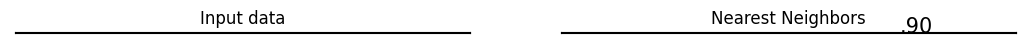

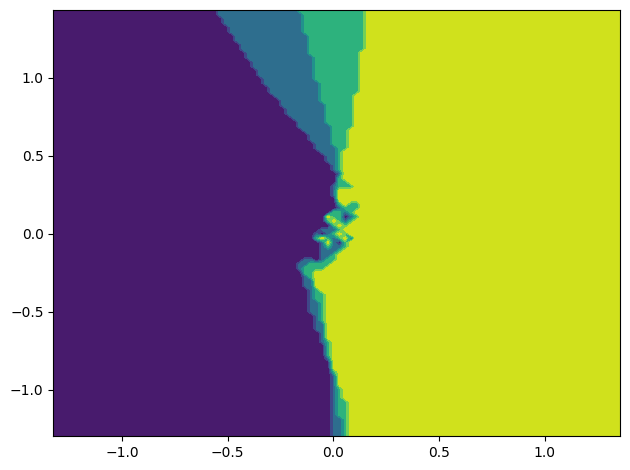

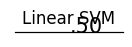

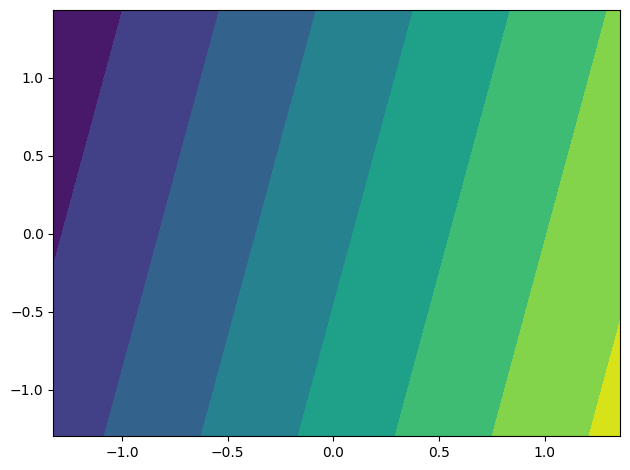

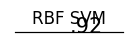

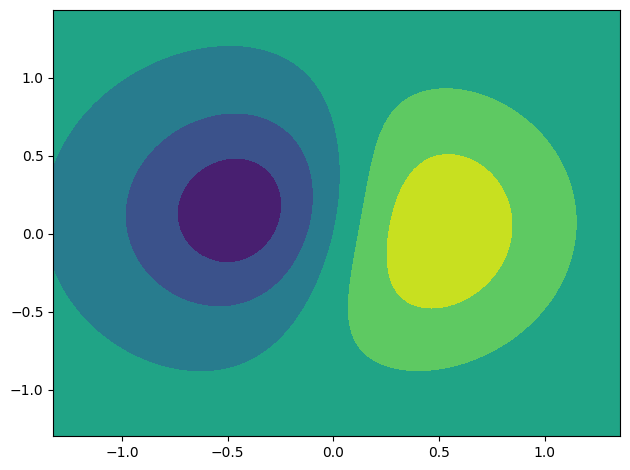

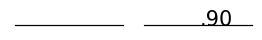

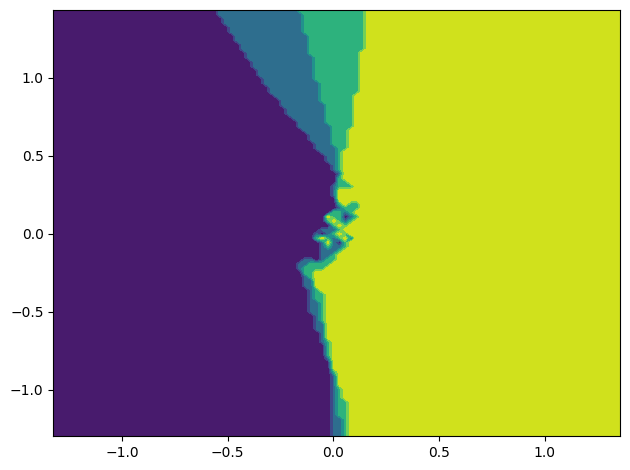

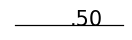

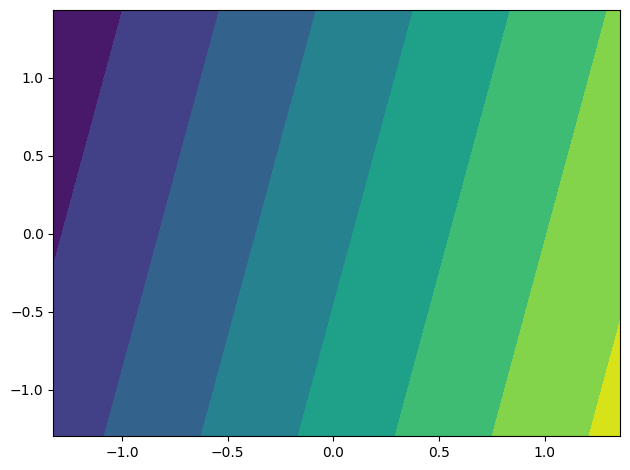

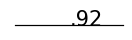

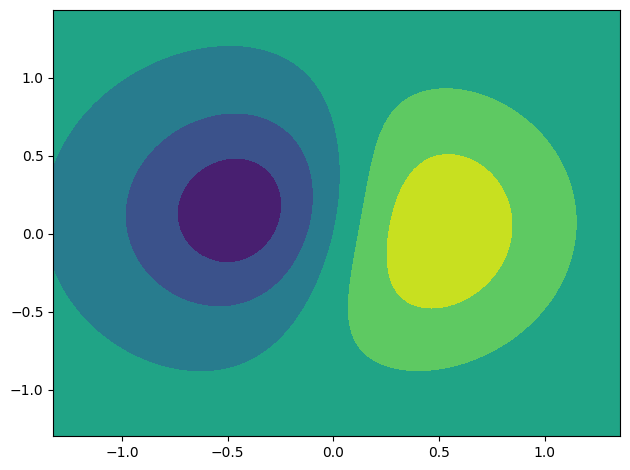

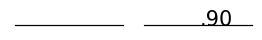

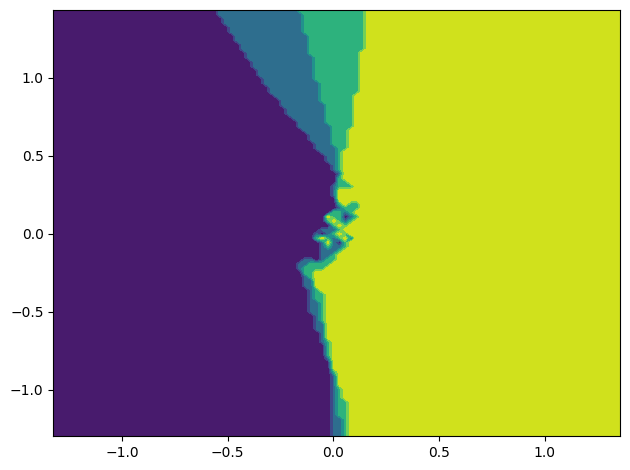

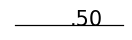

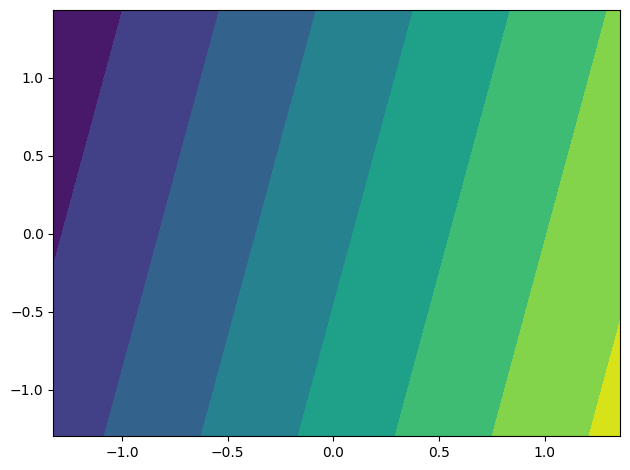

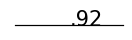

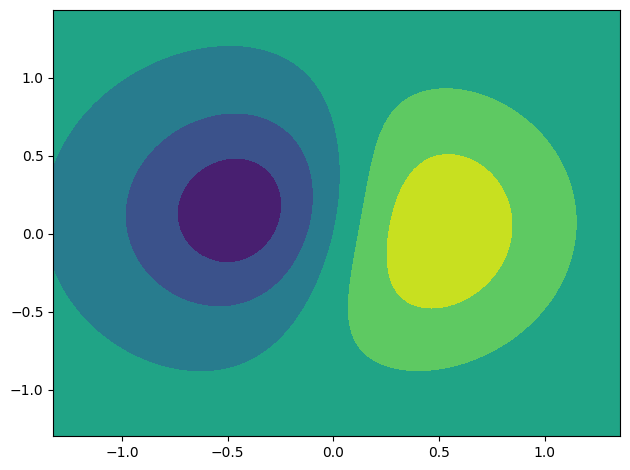

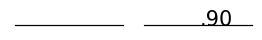

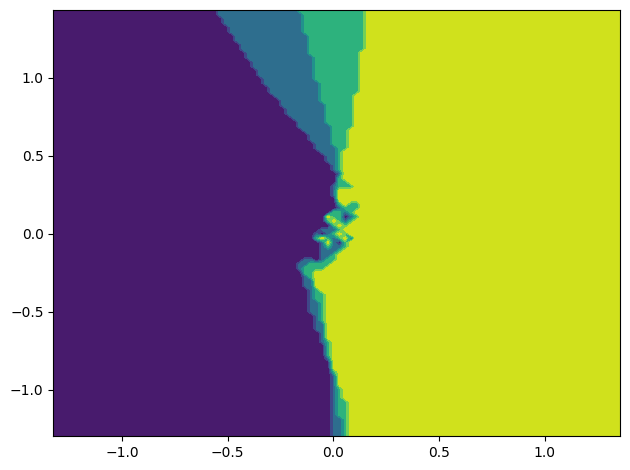

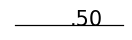

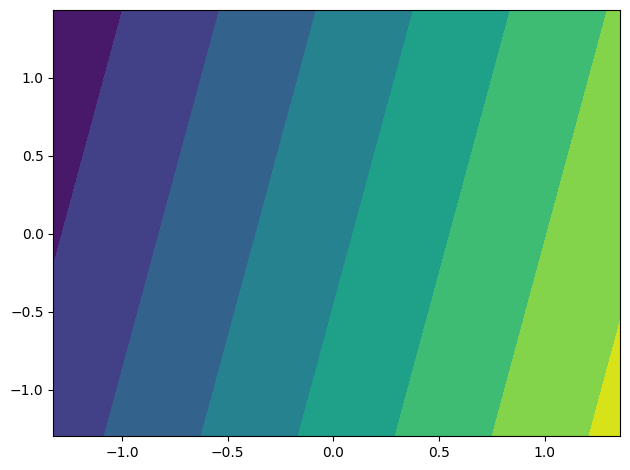

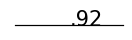

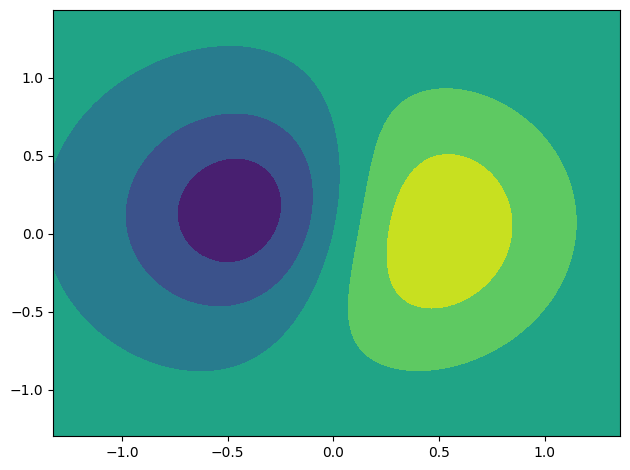

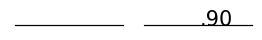

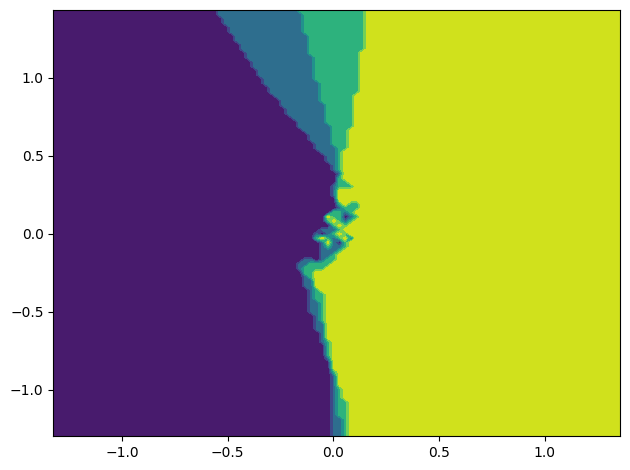

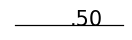

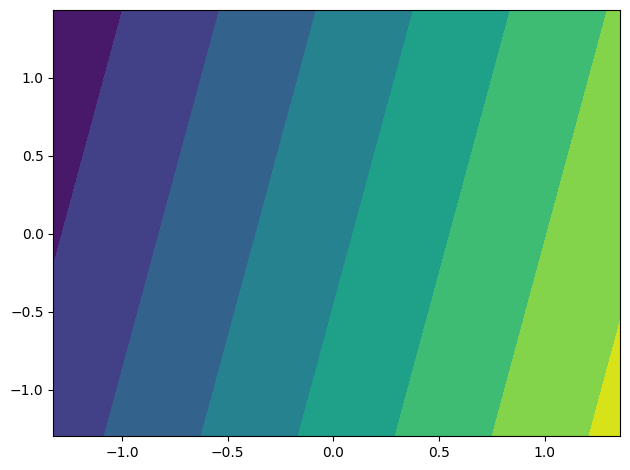

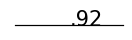

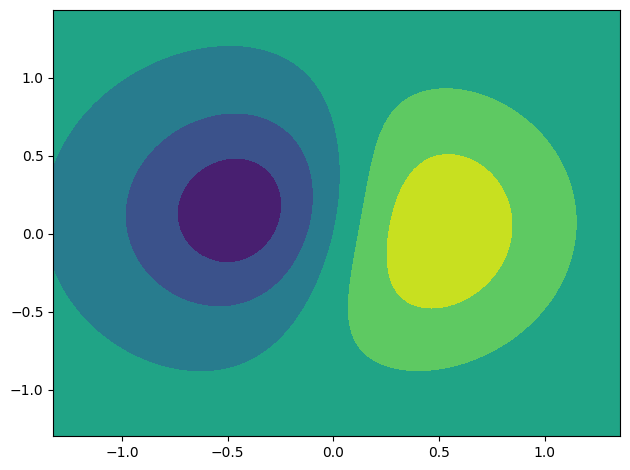

In [109]:
figure = plt.figure(figsize=(27, 9))
i = 1


for ds_cnt, ds in enumerate(df):
    

    x_min, x_max = X_train[:, 1].min() - 0.5, X_train[:, 0].max() + 0.5
    y_min, y_max = X_train[:, 1].min() - 0.5, X_train[:, 1].max() + 0.5
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(["#FF0000", "#0000FF"])
    ax = plt.subplot(len(sample), len(classifiers) + 1, i)
    
    if ds_cnt == 0:
        ax.set_title("Input data")
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors="k")
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6, edgecolors="k")
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1


    for name, clf in zip(names, classifiers):
        ax = plt.subplot(len(sample), len(classifiers) + 1, i)

        clf = make_pipeline(clf)
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)
        DecisionBoundaryDisplay.from_estimator(clf, X_train)
        
        ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors="k")
        ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, edgecolors="k",alpha=0.6)

        ax.set_xlim(x_min, x_max)
        ax.set_ylim(y_min, y_max)
        ax.set_xticks(())
        ax.set_yticks(())
        if ds_cnt == 0:
            ax.set_title(name)
        ax.text(x_max - 0.3, y_min + 0.3, ("%.2f" % score).lstrip("0"), size=15, horizontalalignment="right")
        i += 1

        plt.tight_layout()
        plt.show()